# Лабораторная работа №5 «Решение уравнения переноса на плоскости по разностной схеме "Прямоугольник"»

## Трегуб Екатерина Сергеевна

In [78]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import math

In [79]:
def f(t, x):
    return np.sin(x) + np.cos(t)

def phi(x):
    return np.sin(x)

def ksi(t):
    return np.sin(2*t)

In [80]:
def right_up_point(u_lu, u_ld, u_rd, k, m, f):
    
    return ( f((k + 0.5) * tau, (m - 0.5) * h) - (u_lu - u_ld - u_rd) / (2*tau) + (u_lu - u_rd + u_ld) / (2*h) ) / ( 1/(2*h) + 1/(2*tau) )

In [81]:
# Значения из реального мира
T = 10
X = 10

# Шаг:
#tau = 1
#h = 1

# Размеры сетки:
#K = int(T / tau)
#M = int(X / h)


K = 1000
M = 1000

tau = T / K
h = X / M 

#solution = [[[0] * (K + 1)],[[0] * (M + 1)]]

solution = [0] * K
for i in range(K):
    solution[i] = [0] * M

In [82]:
def solve(ksi, phi, f):
    for k in range(K):
        solution[k][0] = ksi(k * tau)
    
    for m in range(M):
        solution[0][m] = phi(m * h)

    for k in range(K - 1):
        for m in range(1, M):
            solution[k + 1][m] = right_up_point(solution[k + 1][m - 1], solution[k][m - 1], solution[k][m], k, m, f)

In [83]:
#print(solution)

In [87]:
def get_plot_params(x_step, t_step, np_sol):
    x_size = len(solution)
    t_size = len(solution[0])
    x = []
    t = []
    for i in range(x_size):
        x.append(x_step * i)
    for i in range(t_size):
        t.append(t_step * i)
    xgrid, ygrid = np.meshgrid(t, x)
    return xgrid, ygrid

def graphic():
    x, y = get_plot_params(h, tau, solution)  

    np_solution = np.array(solution)
    
    fig = plt.figure(figsize = [12, 4])
    axes = fig.add_subplot(projection = '3d')
    axes.plot_surface(x, y, np_solution)
    plt.xlabel("x axis")
    plt.ylabel("t axis")
    plt.show()

<IPython.core.display.Javascript object>


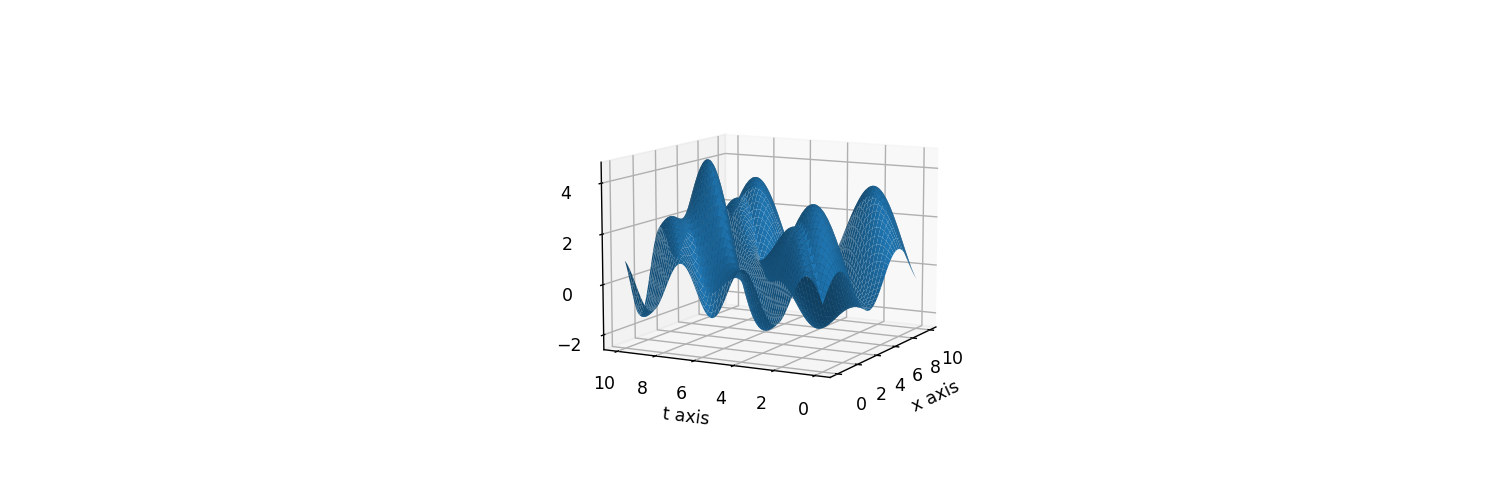

In [88]:
solve(ksi, phi, f)
graphic()

<IPython.core.display.Javascript object>


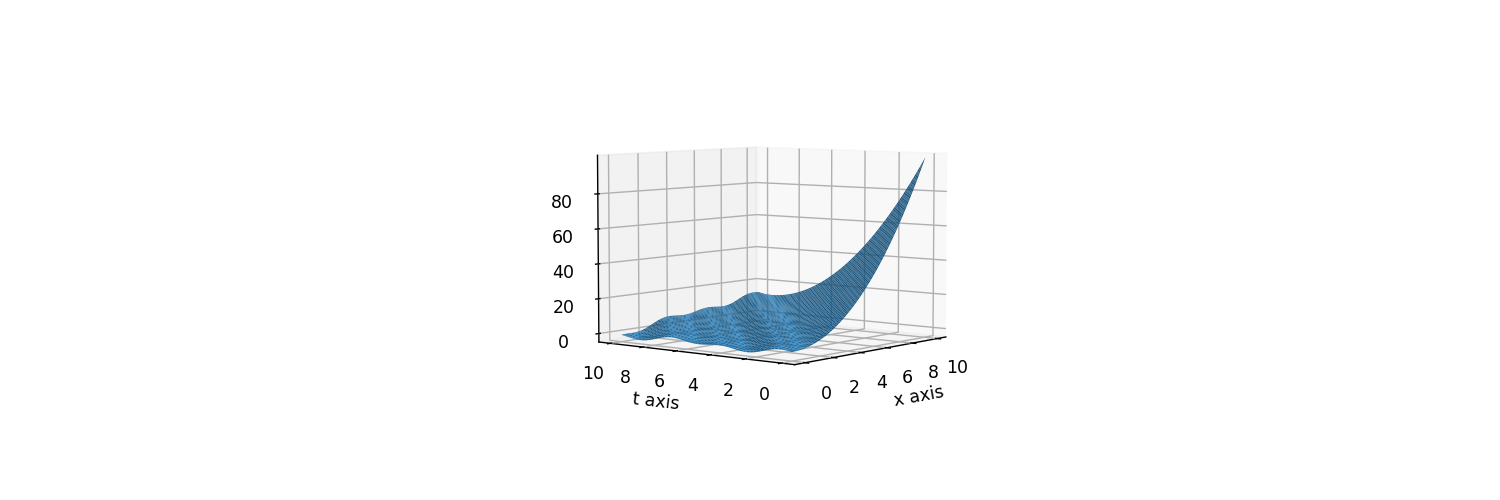

In [92]:
def f1(t, x):
    return np.exp(1/(x + 1))

def phi1(x):
    return x ** 2
def ksi1(t):
    return np.sin(2*t) + np.cos(t) - 1

solve(ksi1, phi1, f1)
graphic()

<IPython.core.display.Javascript object>


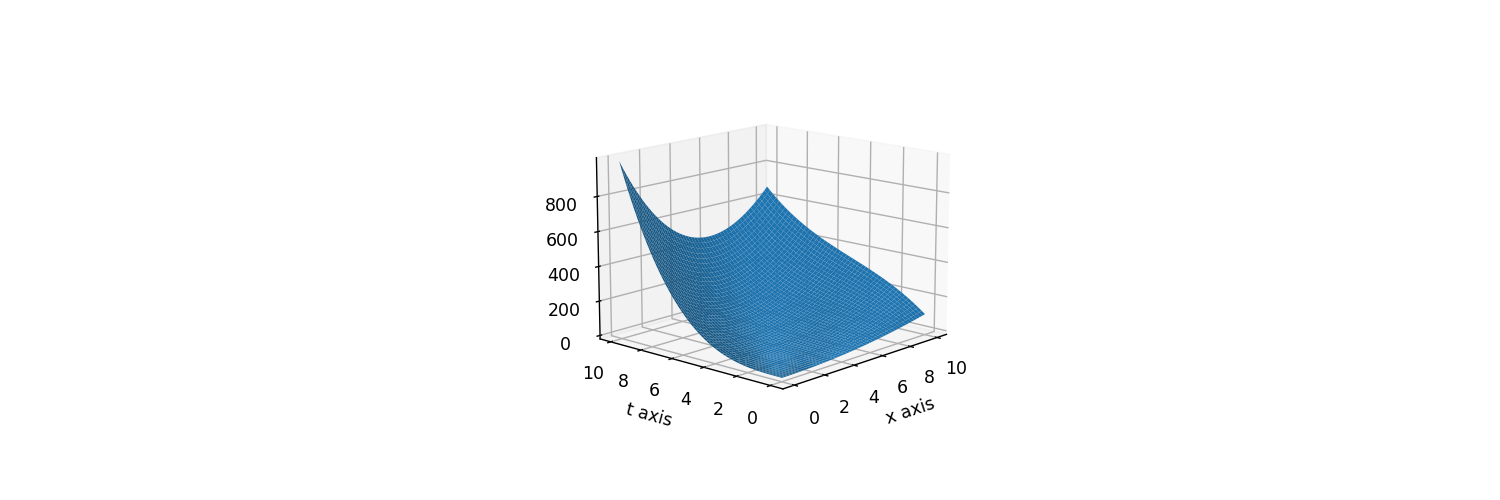

In [95]:
def f10(t, x):
    return x ** 2 + t ** 2

def phi10(x):
    return x ** 2
def ksi10(t):
    return t ** 3 + 1

solve(ksi10, phi10, f10)
graphic()